<a href="https://colab.research.google.com/github/shreeyut1905/InterIIT/blob/main/Try_On_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.2 MB/s eta 0:00:00


In [ ]:
from transformers import AutoFeatureExtractor,SegformerForSemanticSegmentation
import PIL
import requests
import torch
from io import BytesIO
from diffusers import DiffusionPipeline
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn
import cv2
import numpy as np


In [ ]:
def download_image(url):
  response = requests.get(url)
  return PIL.Image.open(BytesIO(response.content)).convert("RGB")

SyntaxError: invalid decimal literal (<ipython-input-5-f60d60192300>, line 1)

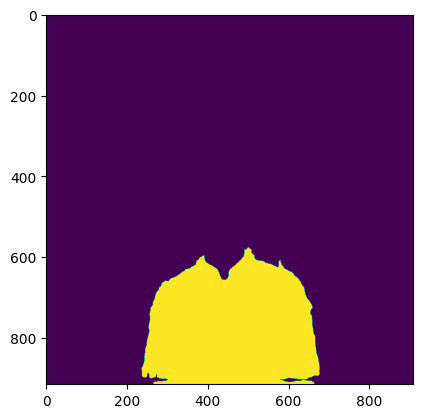

In [ ]:
extractor  = AutoFeatureExtractor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = SegformerForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")
image  =  Image.open('/content/darbari.png').convert('RGB')
inputs = extractor(images=image,return_tensors='pt')

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)
pred_seg = upsampled_logits.argmax(dim=1)[0]
pred_seg[pred_seg != 4]=0
plt.imshow(pred_seg)

In [ ]:
arr_seg = pred_seg.cpu().numpy().astype("uint8")
arr_seg *= 255
pil_seg = Image.fromarray(arr_seg)
pil_seg.save("mask.png")

In [ ]:
img = Image.open("mask.png")
pixels = img.load()
img = img.convert("RGBA")
for i in range(img.size[0]):
  for j in range(img.size[1]):
    if pixels[i,j] != 0: # if not white
      pixels[i,j] = 255 # convert to Black

img.show()
img.save('results.png')

In [ ]:
pipe = DiffusionPipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cpu")


model_index.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors not found


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

image_encoder/config.json:   0%|          | 0.00/524 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
You are using a model of type clip_vision_model to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/unet.
Defaulting to

In [ ]:
img = cv2.imread('results.png',0)
kernel = np.ones((10,10),np.uint8)
dilation = cv2.dilate(img,kernel,iterations=5)

cv2.imwrite('results.png',dilation)

True

In [ ]:
init_image = Image.open("darbari.png").resize((512,512)).convert("RGBA")
mask_image = Image.open("results.png").resize((512,512))
example_image = Image.open('dddd.png').resize((512,512)).convert("RGBA")

In [ ]:
image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]